# ML Showcase: Predicting log_price from processed features

ВIn this notebook you will:

- Load processed_cleaned_apartments.csv
- Split the data into train/validation/test sets
- Train a RandomForest and a LinearRegression model
- Compute RMSE and R²
- Plot “true vs. predicted” and feature importance graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# %% 1) Загрузка данных
df = pd.read_csv('../datasets/processed_cleaned_apartments.csv')

# %% 2) Разбиение по split
train = df[df['split']=='train']
val   = df[df['split']=='val']
test  = df[df['split']=='test']

features = [c for c in df.columns if c not in ('uuid','split','price','log_price')]
X_train, y_train = train[features], train['log_price']
X_val,   y_val   = val[features],   val['log_price']
X_test,  y_test  = test[features],  test['log_price']

print(f"Rows: train={len(X_train)}, val={len(X_val)}, test={len(X_test)}")


Rows: train=8392, val=2395, test=1199


In [3]:
# %% 3) Обучаем и собираем метрики
import numpy as np

models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LinearReg":    LinearRegression()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # сначала MSE, потом sqrt → RMSE
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test, y_pred)

    results[name] = {
        "rmse": rmse,
        "r2":   r2,
        "pred": y_pred
    }

# Таблица метрик
res_df = pd.DataFrame(results).T
display(res_df)


,rmse,r2,pred
RandomForest,0.138463,0.910227,"[12.973286446519054, 13.786696838998193, 13.05..."
LinearReg,0.215552,0.782437,"[12.910853104916766, 13.533753802588981, 12.88..."


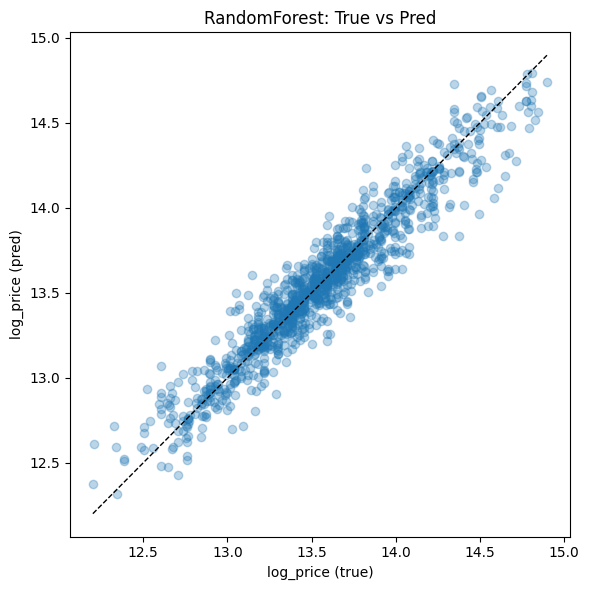

In [4]:
# %% 4) True vs Pred (RandomForest)
y_pred_rf = results["RandomForest"]["pred"]

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
mn, mx = y_test.min(), y_test.max()
plt.plot([mn,mx],[mn,mx],'k--',lw=1)
plt.xlabel("log_price (true)")
plt.ylabel("log_price (pred)")
plt.title("RandomForest: True vs Pred")
plt.tight_layout()
plt.show()



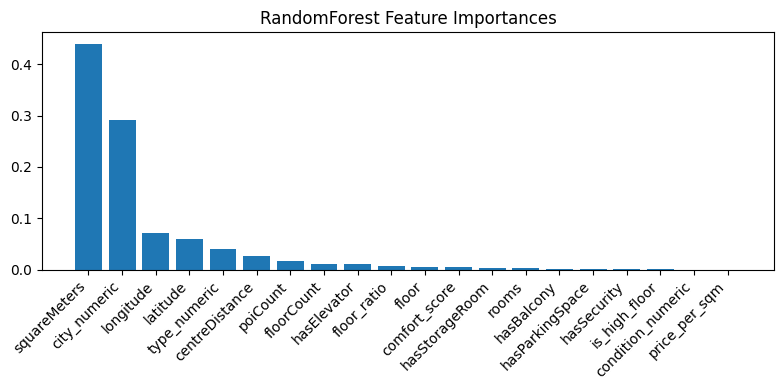

In [5]:
# %% 5) Feature importance (RandomForest)
importances = models["RandomForest"].feature_importances_
idxs = np.argsort(importances)[::-1]

plt.figure(figsize=(8,4))
plt.bar([features[i] for i in idxs], importances[idxs])
plt.xticks(rotation=45, ha='right')
plt.title("RandomForest Feature Importances")
plt.tight_layout()
plt.show()
